# 개념정리

- 계층적 트리 모형을 이용해 개별 개체들을 순차적, 계층적으로 유사한 개체 내지 그룹과 통합하여 군집화를 수행하는 알고리즘
- K-means 군집화와 달리 군집수를 사전에 정하지 않아도 됨(Dendrogram 이용)
- 거리 또는 유사도를 기반으로 클러스터를 형성하는 알고리즘

## Agglomerative Method : 응집형 계층적 클러스터링

- 각 데이터 지점에서 시작해 유사한 지점들을 함꼐 결합해 클러스터를 형성(Bottom-Up 방식)
- 연결 기준에 따라 군집이 달라지므로 데이터 특성, 분포에 따라 적절히 변경하며 확인해야 한다.
- 연결 기준(유클리디안 거리)
  1. single Linkage : 두 클러스터 내의 가장 가까운 점 사이의 거리
    - 먼 거리에 있는 이상한 데이터의 영향을 최소화할 수 있다.
  2. complete Linkage : 두 클러스터 내의 가장 먼 점 사이의 거리
    - 클러스터간 거리가 멀고 클러스터의 밀집도가 높을 경우 좋은 결과를 낸다.
  3. average Linkage : 두 클러스터 내의 모든 점 사이의 평균 거리
    - 무난한 방법이나 데이터에 노이즈가 많고 중심점이 명확하지 않으면 잘 동작하지 않을 수 있다.

# 필수 라이브러리 로딩

In [2]:
# 필수 라이브러리
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='D2Coding')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.rc('figure', figsize=(10,8))

# 데이터셋 로딩

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

## 탐색적 데이터 분석 : EDA

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 데이터프레임으로 변형

In [6]:
data = wine.data
label = wine.target
columns = wine.feature_names

df = pd.DataFrame(data, columns = columns)
print(df.shape)

(178, 13)


In [7]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


## 덴드로그램 시각화
- 적절한 k값을 찾는 방법

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [9]:
cluster_single = linkage(y=data, method = 'single', metric='euclidean')
cluster_average = linkage(y=data, method = 'average', metric='euclidean')
cluster_complete = linkage(y=data, method = 'complete', metric='euclidean')

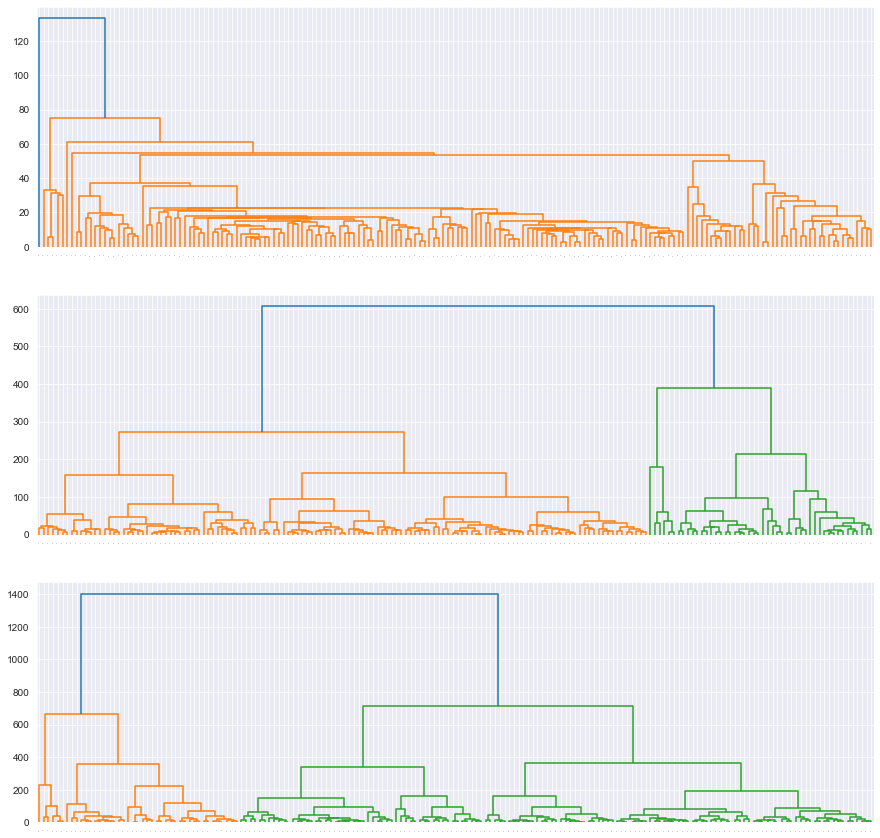

In [12]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(15,15)
ax1 = dendrogram(cluster_single, leaf_font_size = 0, ax=axes[0])
ax2 = dendrogram(cluster_average, leaf_font_size = 0, ax=axes[1])
ax3 = dendrogram(cluster_complete, leaf_font_size = 0, ax=axes[2])

- wine 데이터셋의 특성상 single linkage는 피해야 한다.
- 군집의 수는 3 또는 4개가 적당해 보인다.

## 데이터 전처리 - 피쳐 스케일링과 PCA

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:, :] = scaler.fit_transform(data)
df.describe().loc[['mean', 'std']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [15]:
data = pca.fit_transform(data)
data.shape

(178, 2)

## Agglomeratice Clustering - Single Linkage

In [17]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters = 3, linkage='single')
single_clusters = single_clustering.fit_predict(data)
single_clusters[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
sns.lmplot(x='pca1', y='pca2', data=temp, hue = 'average')

NameError: name 'temp' is not defined

## Agglomeratice Clustering - Average Linkage

## Agglomeratice Clustering - Complete Linkage